In [11]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd

# Specify the path to your local Excel file
file_path = "alpha2-research_pilot.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, header=0)

In [15]:
df.isnull().any()

Study code                 False
Age                        False
Sex 0: male / 1: female    False
Hb                          True
Hct                         True
MCV                         True
MCH                         True
MCHC                        True
RDW                         True
RBC count                   True
Diagnosis                  False
dtype: bool

In [16]:
df_clean = df.dropna(axis=0)

In [17]:
df_clean.shape

(242, 11)

In [18]:
df_clean.isna().any()

Study code                 False
Age                        False
Sex 0: male / 1: female    False
Hb                         False
Hct                        False
MCV                        False
MCH                        False
MCHC                       False
RDW                        False
RBC count                  False
Diagnosis                  False
dtype: bool

In [19]:
df_clean['Diagnosis'].unique()

array([13, 12, 11, 15], dtype=int64)

In [20]:
df_clean_remove = df_clean[df_clean['Diagnosis'] != 15]

In [21]:
df_clean_remove['Diagnosis'].unique()

array([13, 12, 11], dtype=int64)

In [22]:
df_clean_remove.describe()

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,129.680180,30.797297,0.509009,12.875225,39.468604,74.856306,24.503649,32.609459,15.448198,5.349234,11.792793
std,75.852986,6.931428,0.501049,1.709428,4.873935,10.308180,4.160462,1.485480,3.113170,0.853181,0.680925
min,1.000000,17.000000,0.000000,7.500000,26.600000,48.800000,14.700000,27.000000,9.700000,3.670000,11.000000
25%,64.250000,26.000000,0.000000,11.700000,35.950000,66.350000,20.900000,31.600000,13.200000,4.760000,11.000000
50%,129.500000,30.000000,1.000000,13.000000,39.500000,72.950000,23.350000,32.700000,14.850000,5.265000,12.000000
75%,194.750000,35.750000,1.000000,14.100000,43.300000,83.975000,28.275000,33.675000,17.000000,5.927500,12.000000
max,258.000000,53.000000,1.000000,17.400000,50.100000,96.400000,33.200000,36.200000,26.800000,7.520000,13.000000


In [23]:
df_clean_remove

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
0,1,36,1,10.5,32.4,87.7,28.5,32.4,14.4,3.69,13
1,2,40,0,13.7,42.7,64.6,20.7,32.1,17.8,6.61,12
2,3,18,1,12.9,40.6,65.9,20.9,31.8,17.2,6.16,12
3,4,19,0,13.4,41.6,79.8,25.7,32.2,13.2,5.21,11
4,5,35,1,12.8,38.7,85.6,28.3,33.1,13.2,4.52,11
...,...,...,...,...,...,...,...,...,...,...,...
253,254,26,0,14.4,41.8,86.7,29.9,34.4,11.3,4.82,11
254,255,43,1,10.9,34.3,62.6,19.9,31.8,17.9,5.48,12
255,256,49,0,13.8,40.5,90.6,30.9,34.1,13.7,4.47,11
256,257,31,1,11.6,34.9,93.9,31.3,33.5,13.6,3.71,11


In [24]:
df_clean_remove.groupby('Diagnosis')['Diagnosis'].count()

Diagnosis
11     79
12    110
13     33
Name: Diagnosis, dtype: int64

In [25]:
Xo = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).values
yo = df_clean_remove['Diagnosis'].values

In [26]:
Xo.shape

(222, 9)

In [27]:
labelnames = ['Normal', 'Medium', 'Critical']
yo[yo==11] = 0
yo[yo==12] = 1
yo[yo==13] = 2

In [28]:
yo

array([2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [29]:
pip install scikit-learn


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0) 
#Xo = features => X_train, X_test
#yo = label 0,1,2 => y, yt

#X_test (test)
#yt (test)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)
#X_train => X_train, X_val
#y => y, yv 

#X_train (train), X_val (valid)
#y (train), yv (valid)

In [32]:
X_train.shape

(141, 9)

In [33]:
X_val.shape

(36, 9)

In [34]:
X_test.shape

(45, 9)

In [35]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
#X_train (train), X_val (valid)
#y (train), yv (valid)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res) #train
X_val_norm = scl.transform(X_val) #val
X_test_norm = scl.transform(X_test) #test
y = y_res #train

In [37]:
import joblib
joblib.dump(scl, "thalscl.sav")

['thalscl.sav']

In [38]:
y

array([1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [39]:
yv

array([2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2], dtype=int64)

In [40]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32) #train
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32) #val
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32) #test

In [41]:
yv_multi

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [42]:
sample_size, input_size = X_train_norm.shape

In [43]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [48]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_multi, epochs= 1, batch_size = sample_size, validation_data= (X_val, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

1/1 [==============================] - 0s 87ms/step - loss: 0.9353 - accuracy: 0.4180 - val_loss: 23.9029 - val_accuracy: 0.1944


In [49]:
pip install seaborn


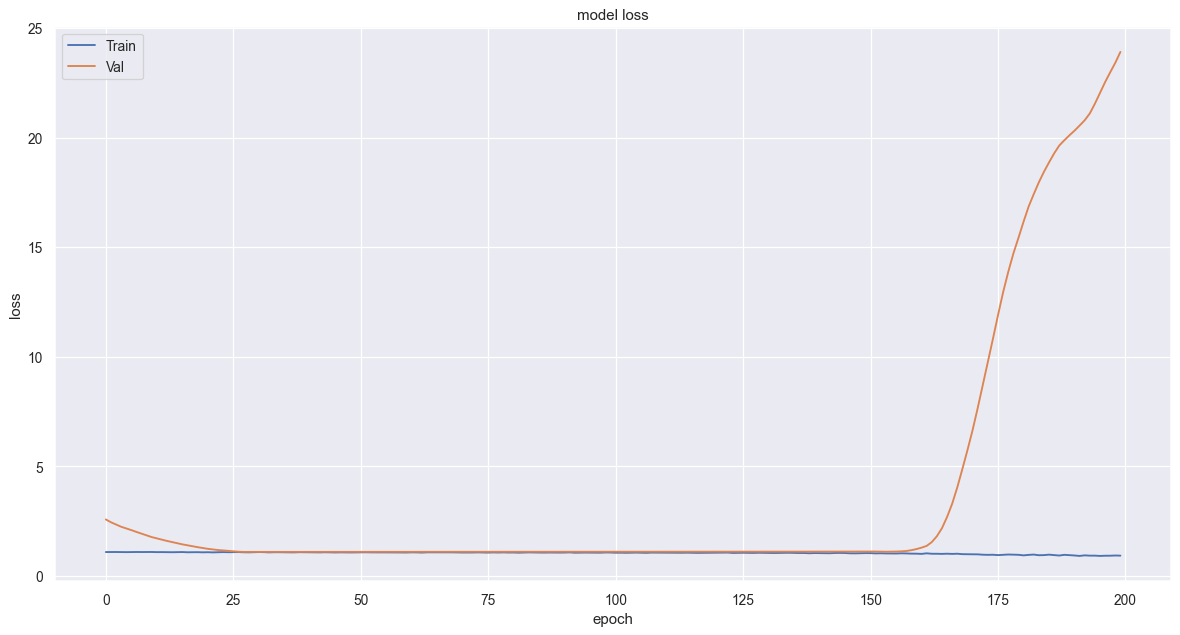

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [51]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

2/2 [==============================] - 0s 7ms/step


0.3333333333333333

In [52]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [53]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_test_norm)
shap_values = explainer.shap_values(X_test_norm)

2/2 [==============================] - 0s 3ms/step


  0%|          | 0/45 [00:00<?, ?it/s]

718/718 [==============================] - 1s 1ms/step


  2%|▏         | 1/45 [00:01<01:14,  1.69s/it]

718/718 [==============================] - 1s 2ms/step


  4%|▍         | 2/45 [00:03<01:11,  1.66s/it]

718/718 [==============================] - 2s 2ms/step


  7%|▋         | 3/45 [00:05<01:15,  1.81s/it]

718/718 [==============================] - 1s 2ms/step


  9%|▉         | 4/45 [00:07<01:13,  1.80s/it]

718/718 [==============================] - 1s 2ms/step


 11%|█         | 5/45 [00:08<01:11,  1.78s/it]

718/718 [==============================] - 1s 2ms/step


 13%|█▎        | 6/45 [00:11<01:24,  2.17s/it]

718/718 [==============================] - 1s 2ms/step


 16%|█▌        | 7/45 [00:13<01:14,  1.95s/it]

718/718 [==============================] - 1s 1ms/step


 18%|█▊        | 8/45 [00:14<01:06,  1.80s/it]

718/718 [==============================] - 1s 1ms/step


 20%|██        | 9/45 [00:16<01:01,  1.70s/it]

718/718 [==============================] - 1s 1ms/step


 22%|██▏       | 10/45 [00:17<00:56,  1.63s/it]

718/718 [==============================] - 1s 1ms/step


 24%|██▍       | 11/45 [00:19<00:53,  1.57s/it]

718/718 [==============================] - 1s 2ms/step


 27%|██▋       | 12/45 [00:20<00:51,  1.56s/it]

718/718 [==============================] - 1s 1ms/step


 29%|██▉       | 13/45 [00:22<00:49,  1.54s/it]

718/718 [==============================] - 1s 1ms/step


 31%|███       | 14/45 [00:23<00:47,  1.54s/it]

718/718 [==============================] - 1s 1ms/step


 33%|███▎      | 15/45 [00:25<00:44,  1.49s/it]

718/718 [==============================] - 1s 1ms/step


 36%|███▌      | 16/45 [00:26<00:43,  1.51s/it]

718/718 [==============================] - 1s 1ms/step


 38%|███▊      | 17/45 [00:27<00:40,  1.46s/it]

718/718 [==============================] - 1s 1ms/step


 40%|████      | 18/45 [00:29<00:38,  1.44s/it]

718/718 [==============================] - 1s 2ms/step


 42%|████▏     | 19/45 [00:30<00:38,  1.48s/it]

718/718 [==============================] - 1s 1ms/step


 44%|████▍     | 20/45 [00:32<00:36,  1.46s/it]

718/718 [==============================] - 1s 1ms/step


 47%|████▋     | 21/45 [00:33<00:34,  1.45s/it]

718/718 [==============================] - 1s 1ms/step


 49%|████▉     | 22/45 [00:35<00:32,  1.42s/it]

718/718 [==============================] - 1s 2ms/step


 51%|█████     | 23/45 [00:36<00:32,  1.49s/it]

718/718 [==============================] - 1s 1ms/step


 53%|█████▎    | 24/45 [00:38<00:29,  1.43s/it]

718/718 [==============================] - 1s 1ms/step


 56%|█████▌    | 25/45 [00:39<00:27,  1.38s/it]

718/718 [==============================] - 1s 1ms/step


 58%|█████▊    | 26/45 [00:40<00:26,  1.37s/it]

718/718 [==============================] - 1s 1ms/step


 60%|██████    | 27/45 [00:41<00:24,  1.35s/it]

718/718 [==============================] - 1s 1ms/step


 62%|██████▏   | 28/45 [00:43<00:22,  1.35s/it]

718/718 [==============================] - 1s 1ms/step


 64%|██████▍   | 29/45 [00:44<00:21,  1.37s/it]

718/718 [==============================] - 1s 1ms/step


 67%|██████▋   | 30/45 [00:46<00:20,  1.37s/it]

718/718 [==============================] - 1s 1ms/step


 69%|██████▉   | 31/45 [00:47<00:19,  1.38s/it]

718/718 [==============================] - 1s 1ms/step


 71%|███████   | 32/45 [00:48<00:17,  1.35s/it]

718/718 [==============================] - 1s 1ms/step


 73%|███████▎  | 33/45 [00:50<00:16,  1.35s/it]

718/718 [==============================] - 1s 1ms/step


 76%|███████▌  | 34/45 [00:51<00:15,  1.38s/it]

718/718 [==============================] - 1s 2ms/step


 78%|███████▊  | 35/45 [00:53<00:14,  1.47s/it]

718/718 [==============================] - 1s 1ms/step


 80%|████████  | 36/45 [00:54<00:12,  1.43s/it]

718/718 [==============================] - 1s 1ms/step


 82%|████████▏ | 37/45 [00:56<00:11,  1.45s/it]

718/718 [==============================] - 1s 1ms/step


 84%|████████▍ | 38/45 [00:57<00:10,  1.47s/it]

718/718 [==============================] - 1s 1ms/step


 87%|████████▋ | 39/45 [00:59<00:08,  1.45s/it]

718/718 [==============================] - 1s 1ms/step


 89%|████████▉ | 40/45 [01:00<00:07,  1.47s/it]

718/718 [==============================] - 1s 1ms/step


 91%|█████████ | 41/45 [01:01<00:05,  1.44s/it]

718/718 [==============================] - 1s 1ms/step


 93%|█████████▎| 42/45 [01:03<00:04,  1.49s/it]

718/718 [==============================] - 1s 1ms/step


 96%|█████████▌| 43/45 [01:04<00:02,  1.47s/it]

718/718 [==============================] - 1s 1ms/step


 98%|█████████▊| 44/45 [01:06<00:01,  1.46s/it]

718/718 [==============================] - 1s 1ms/step


100%|██████████| 45/45 [01:08<00:00,  1.51s/it]


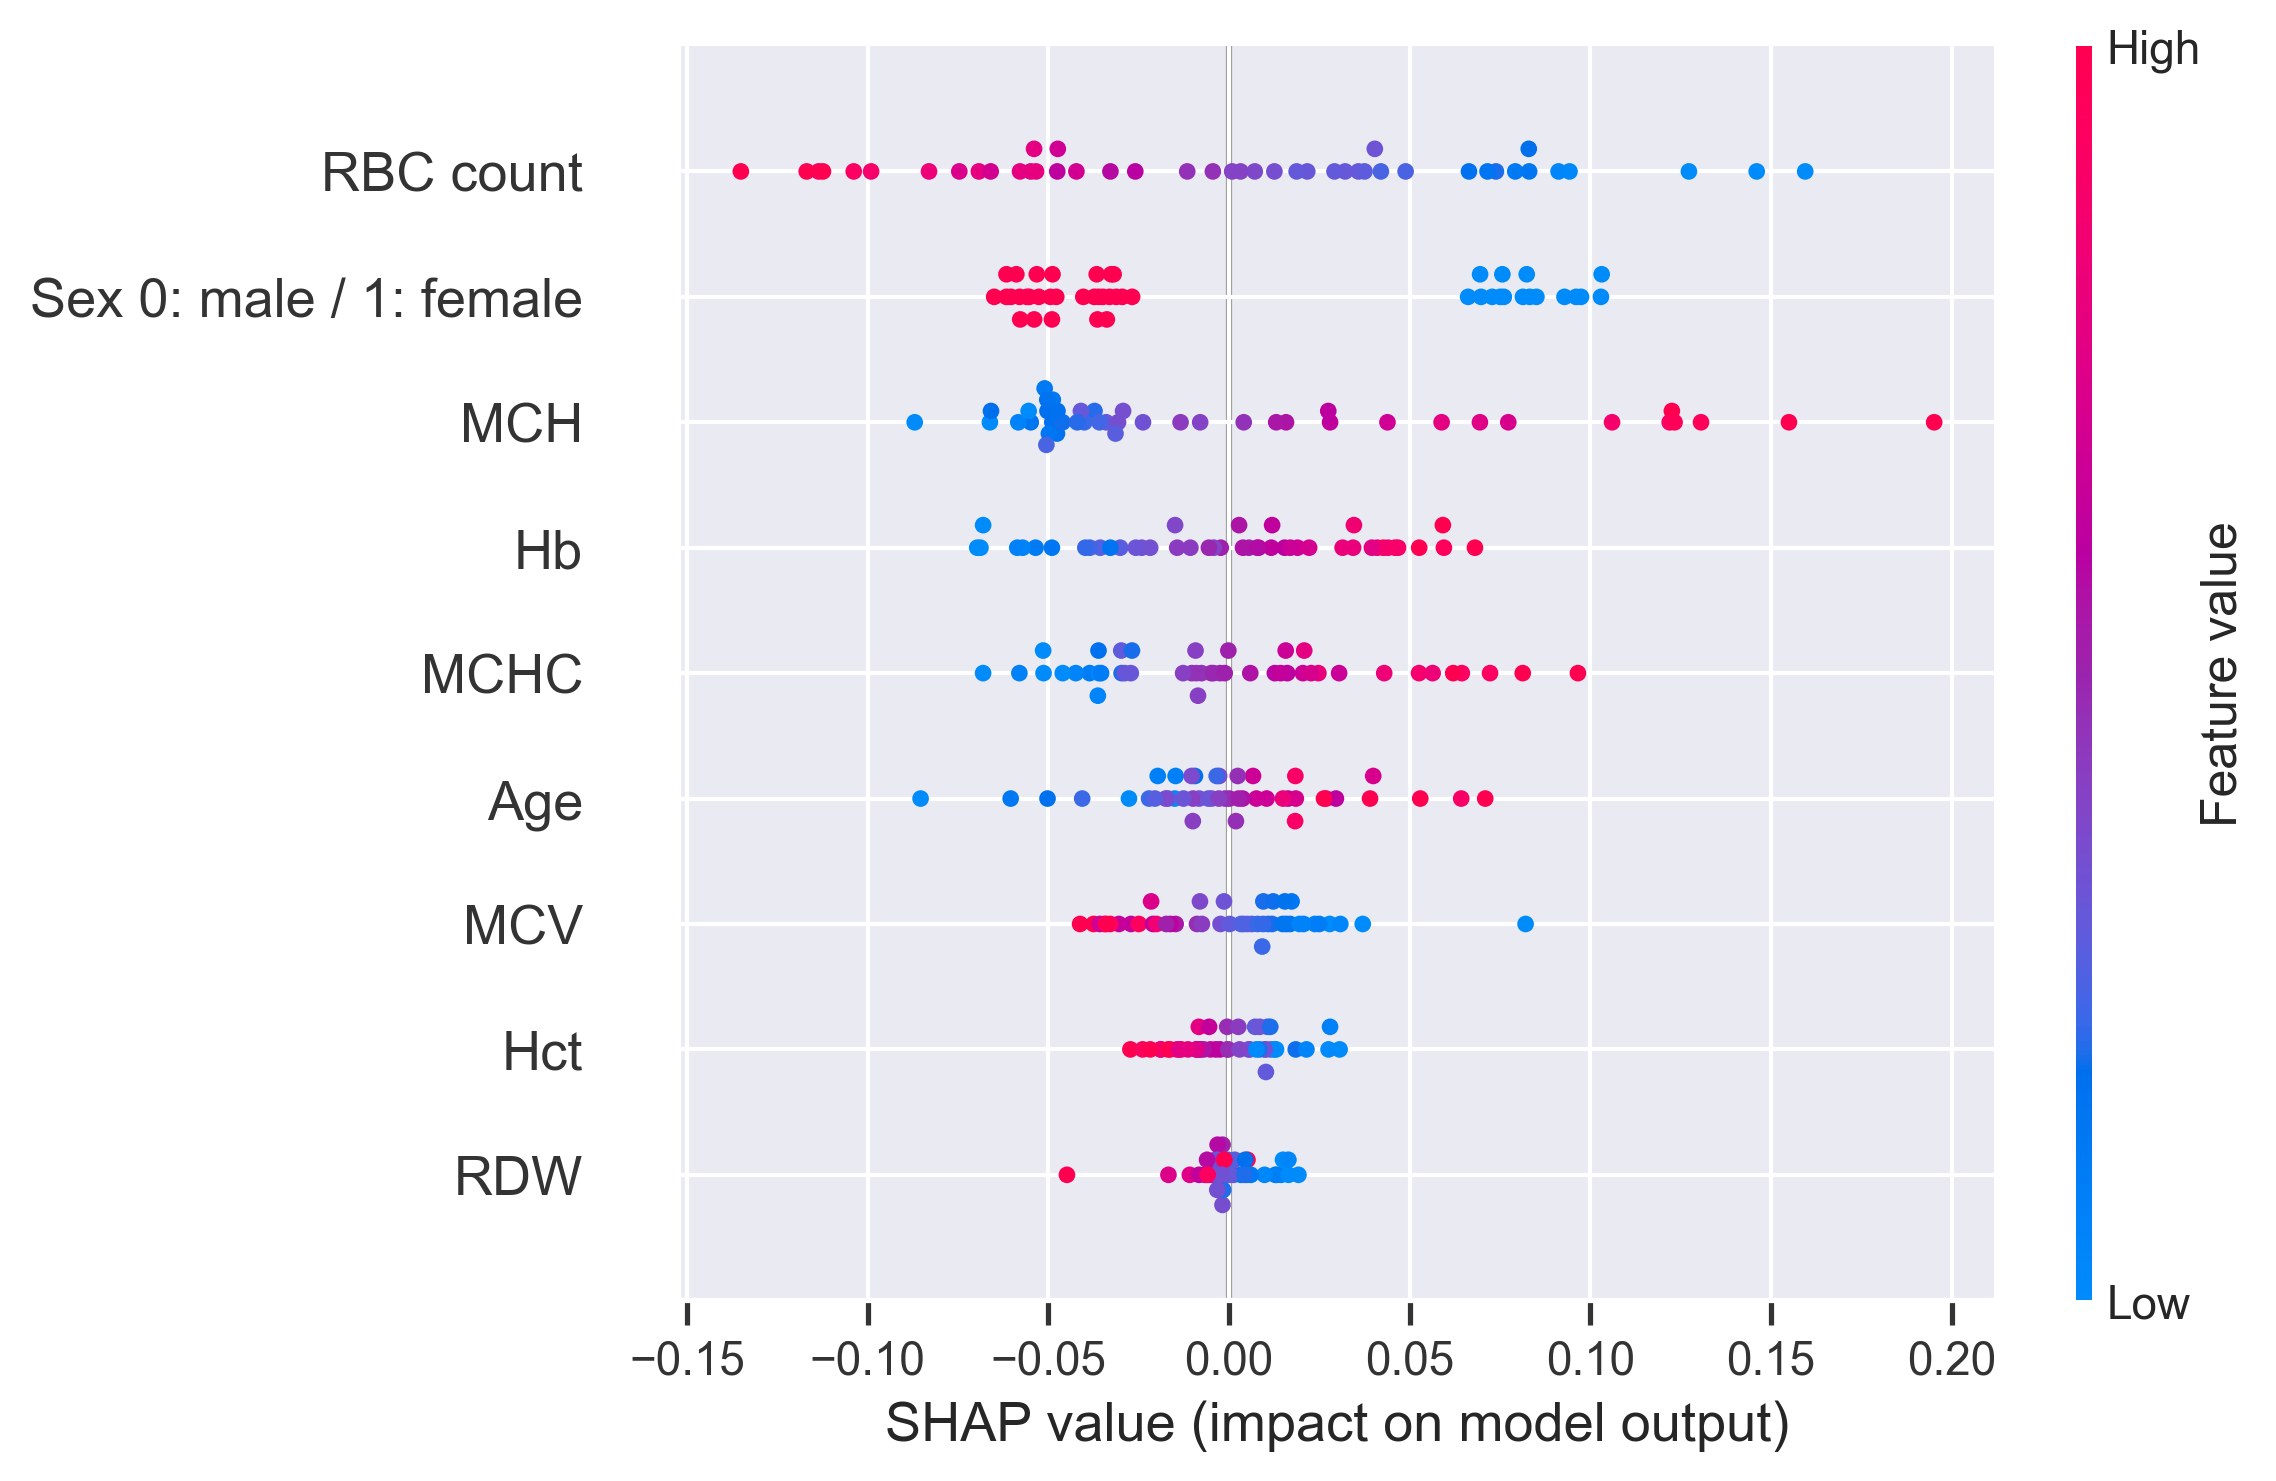

In [54]:
import os
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[0], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

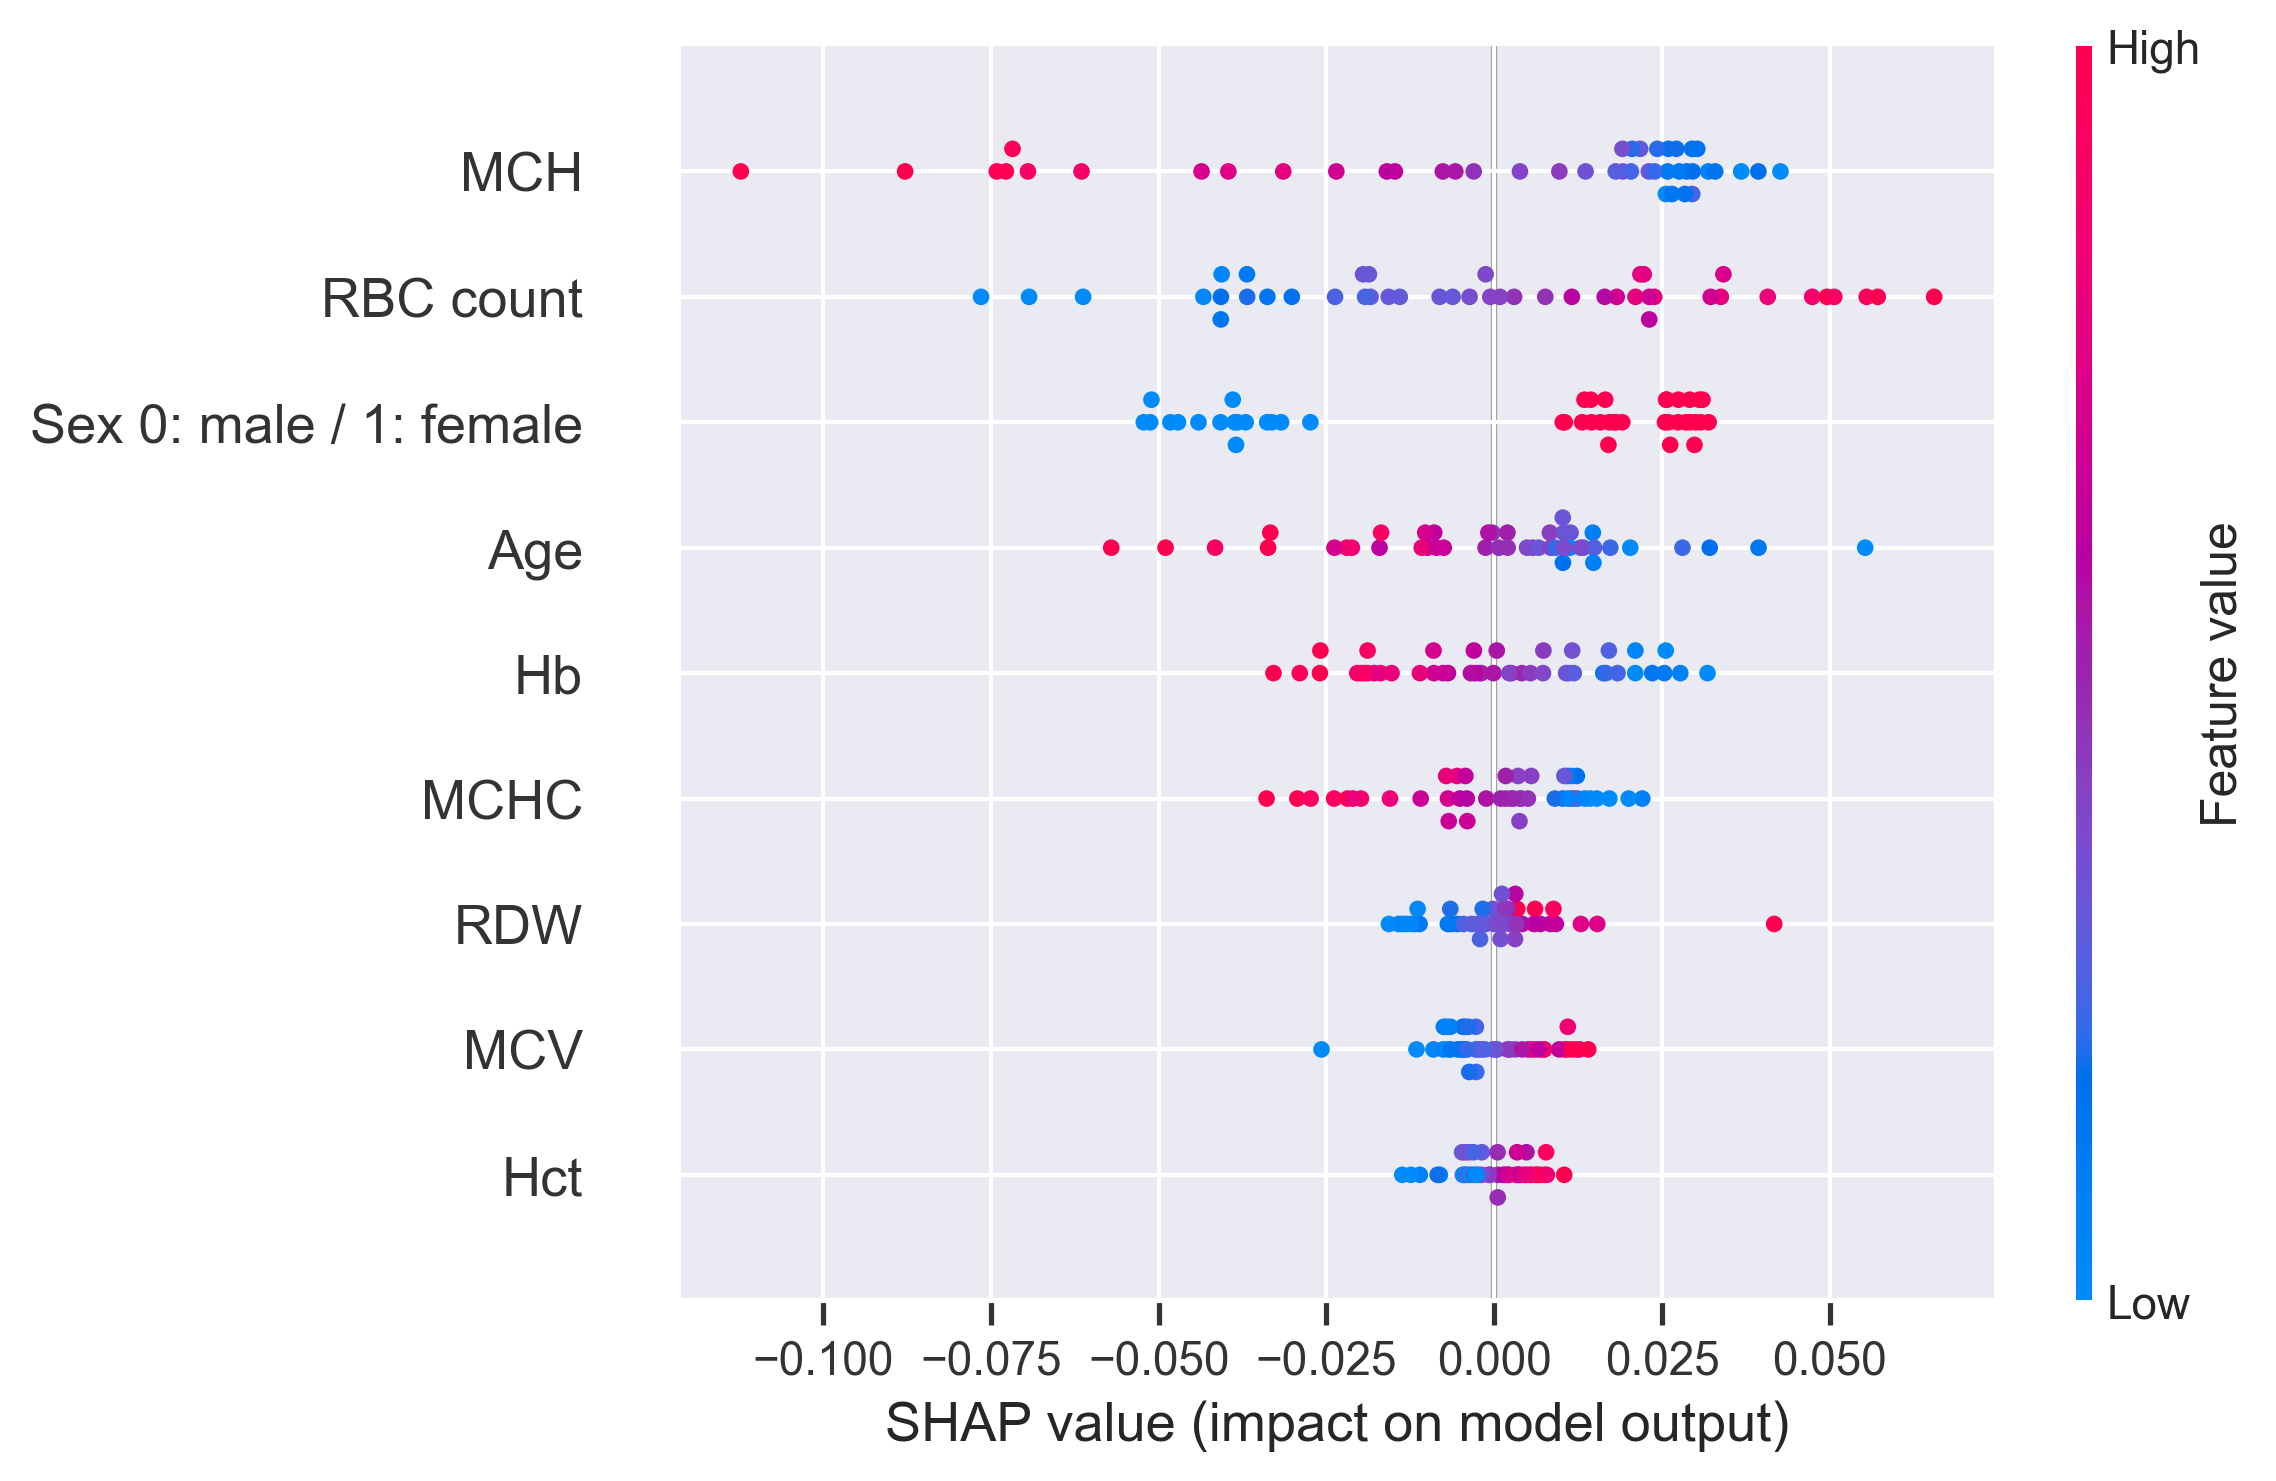

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[1], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

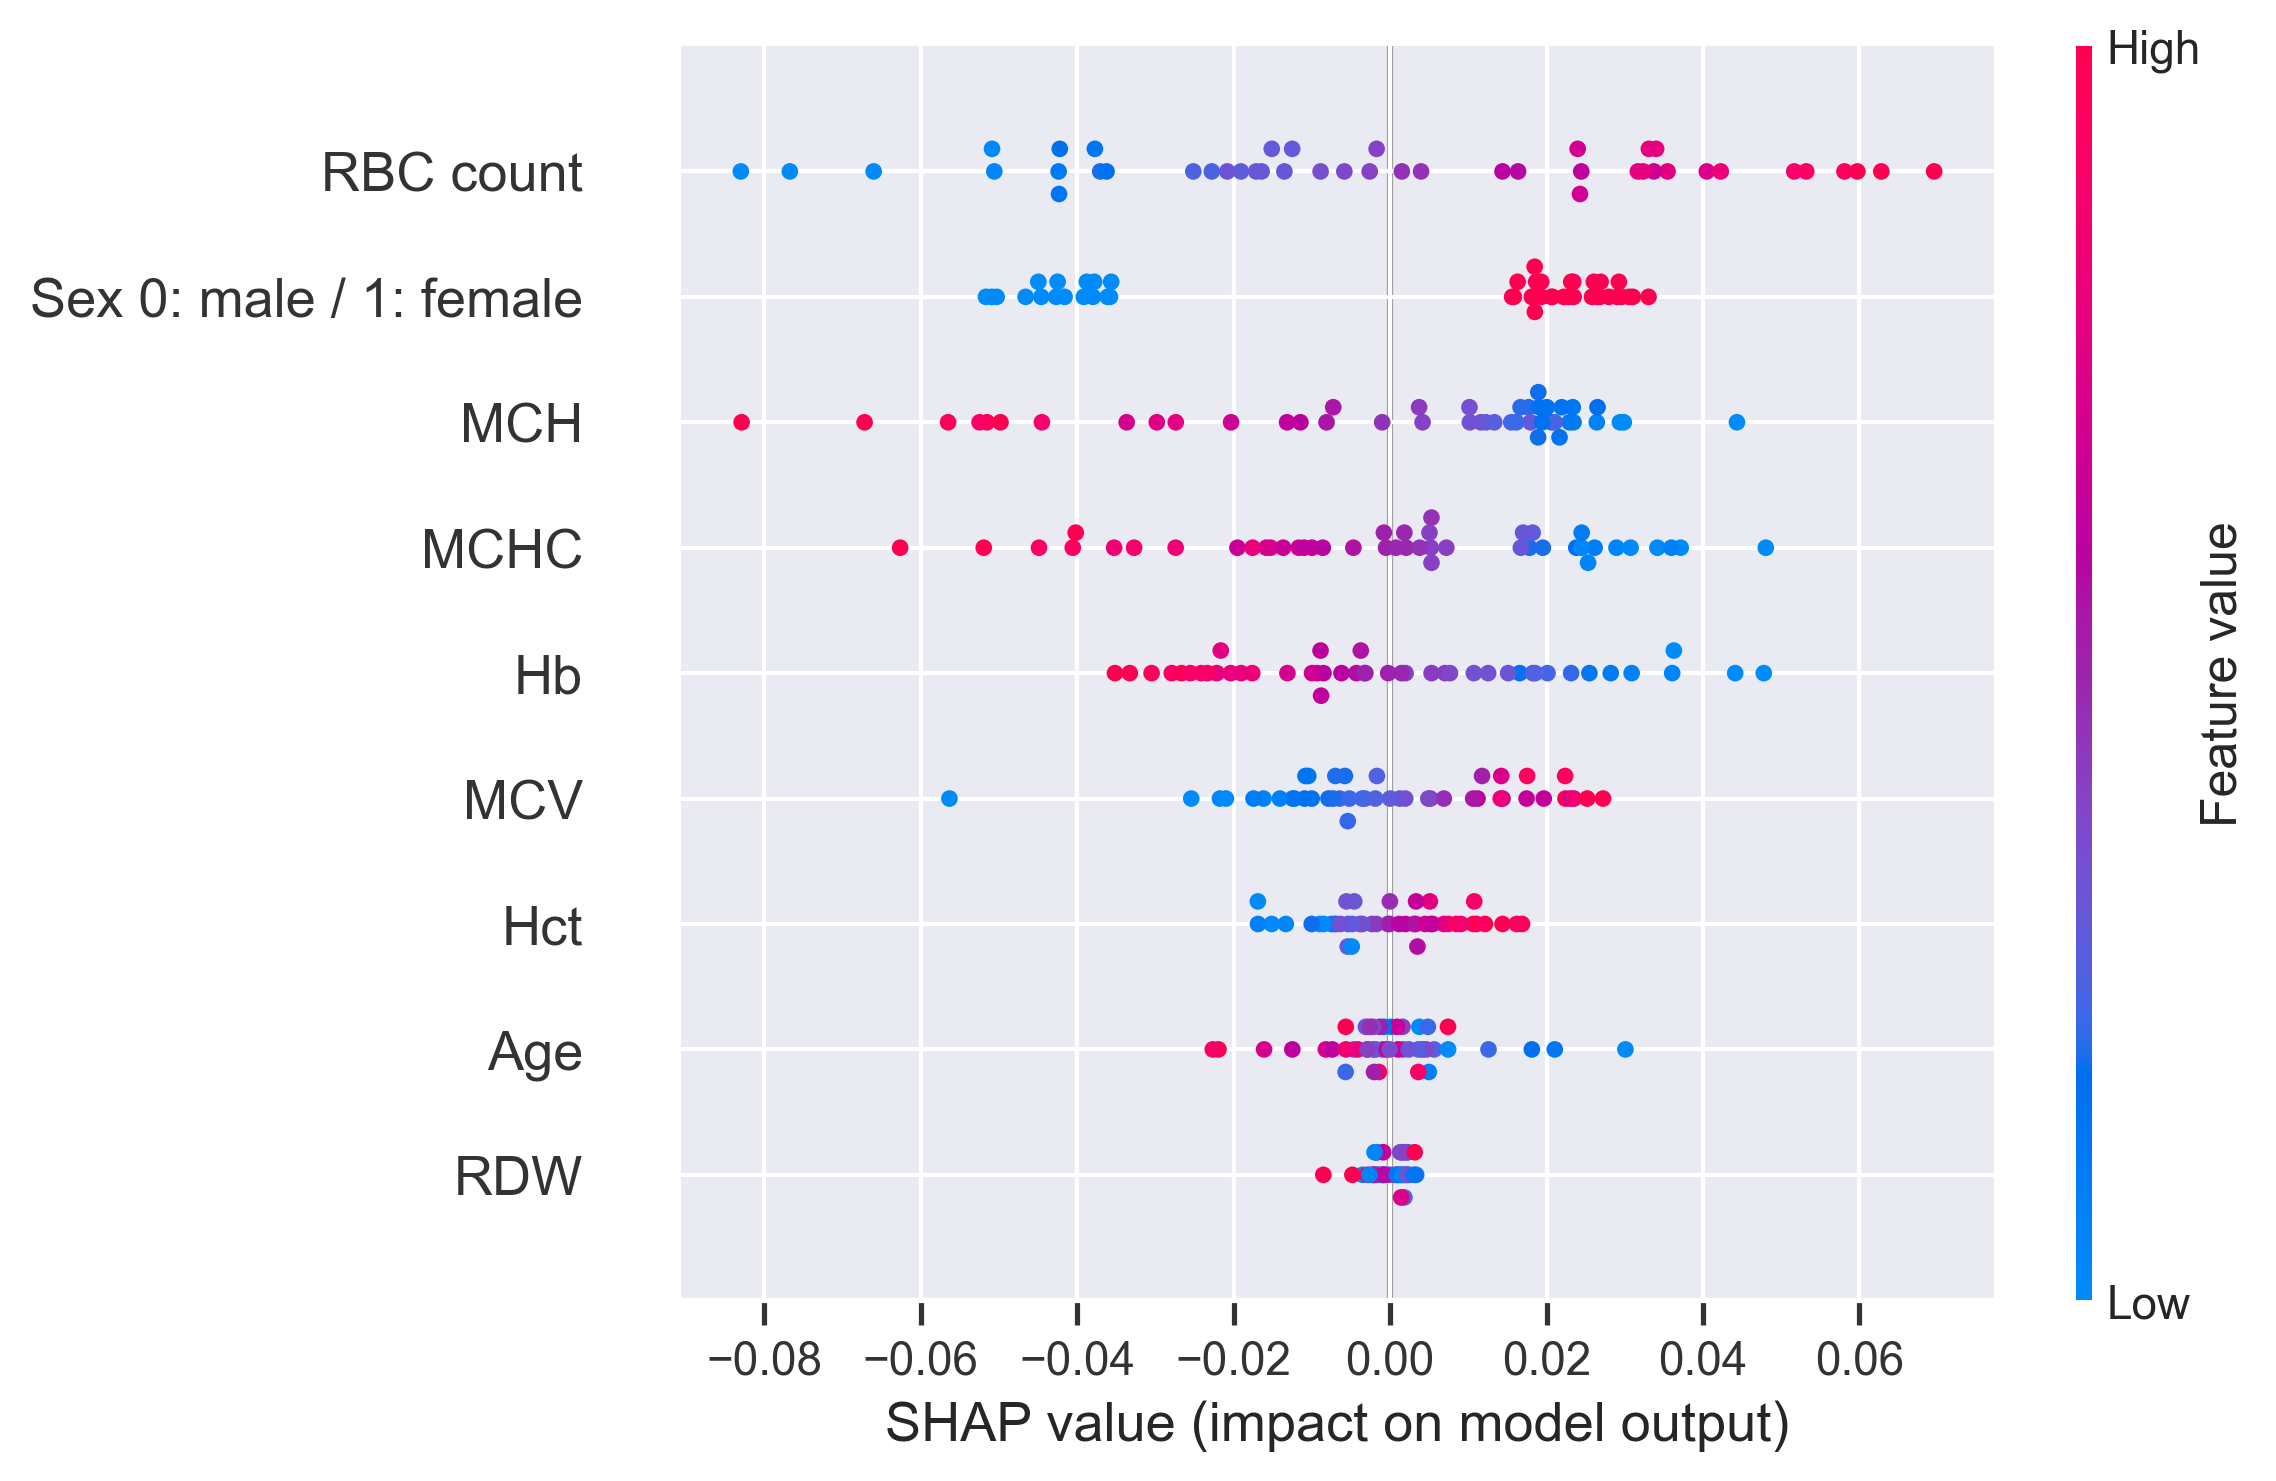

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[2], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

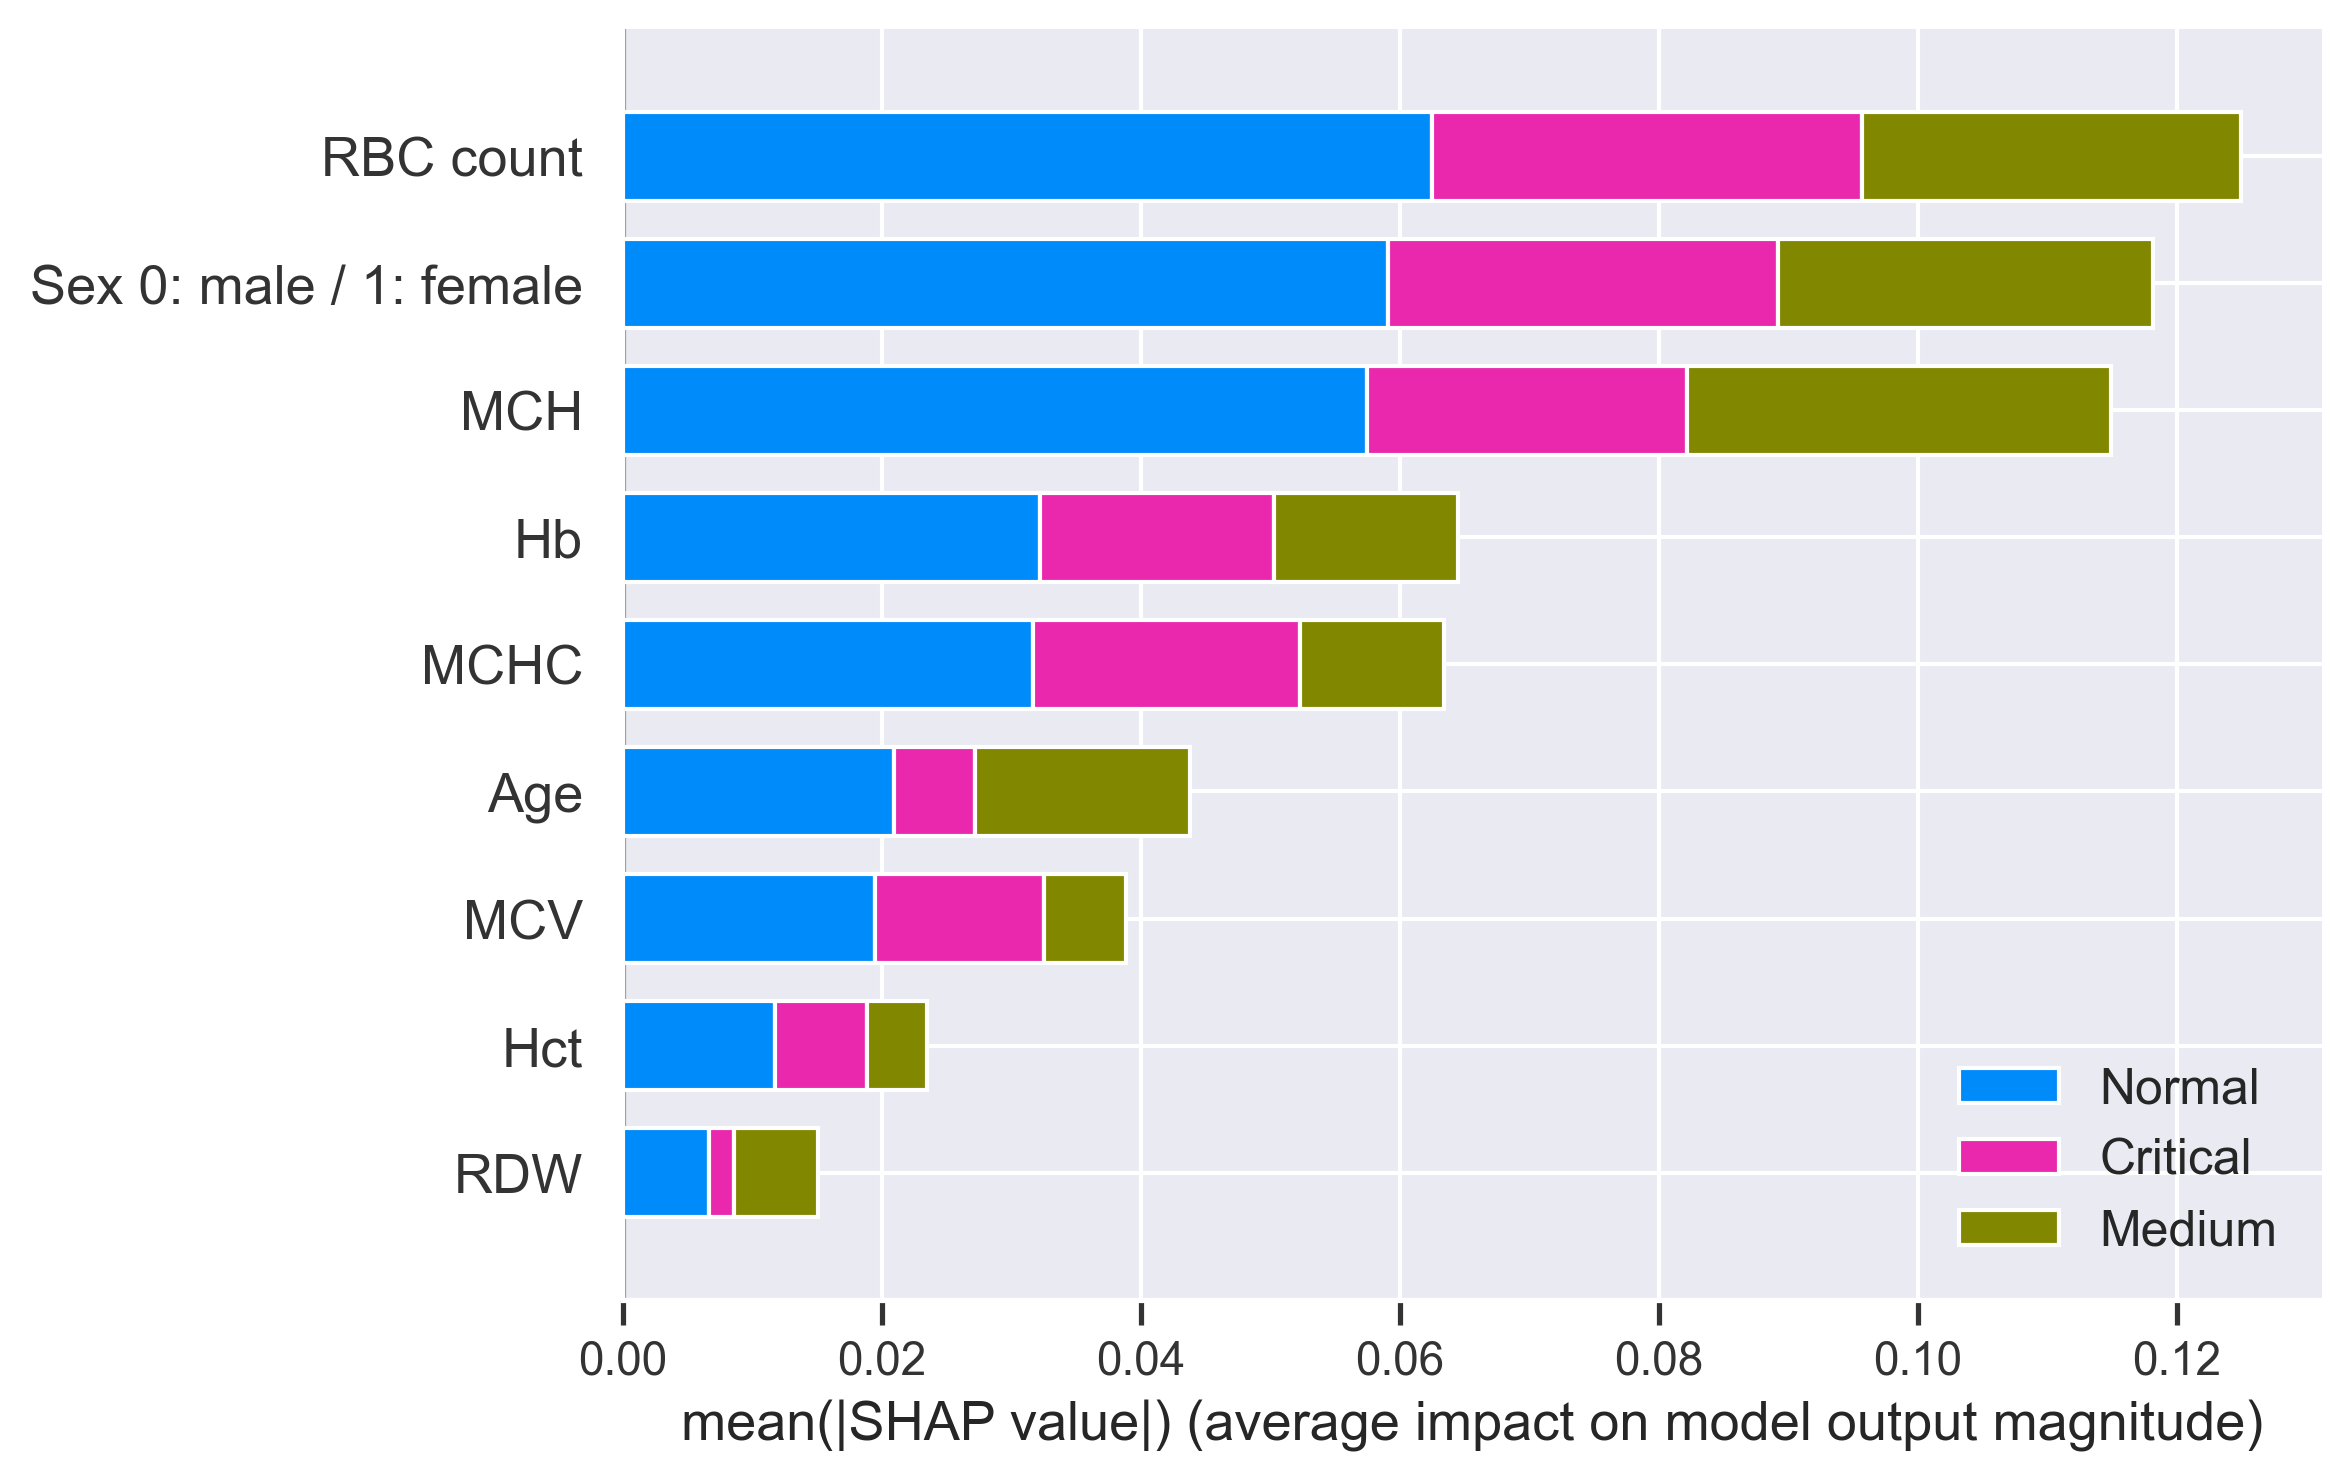

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values, X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=labelnames, show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in (cf/(cf.sum(axis=0, keepdims=True))).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [59]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/97/43/4cd9dc8c051537ed0613fcfc4229dfb9eb39fe058c8d42632977465bfdb5/numpy-1.26.0-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.1 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 807.0 kB/s eta 0:00:00
Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


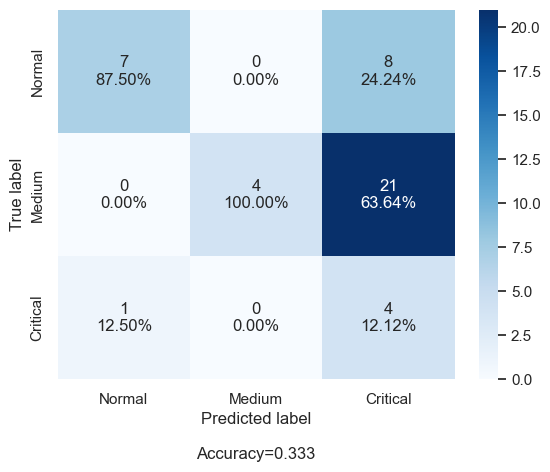

In [60]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=labelnames)

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = SVC(random_state=1, probability=True)
eclf = VotingClassifier(
        estimators=[('lr', clf1), 
                    ('rf', clf2), 
                    ('svm', clf3)],
        voting='soft')
params = {#'lr__C': [1.0, 100.0], 
          'rf__n_estimators': [20, 200],
          'svm__C': [1, 2, 4, 8, 16, 32],
          }
grid = GridSearchCV(estimator=eclf, param_grid=params,  cv=10)
grid = grid.fit(X_train_norm,y)

In [62]:
import joblib
joblib.dump(grid, "thalmodel.sav")

['thalmodel.sav']

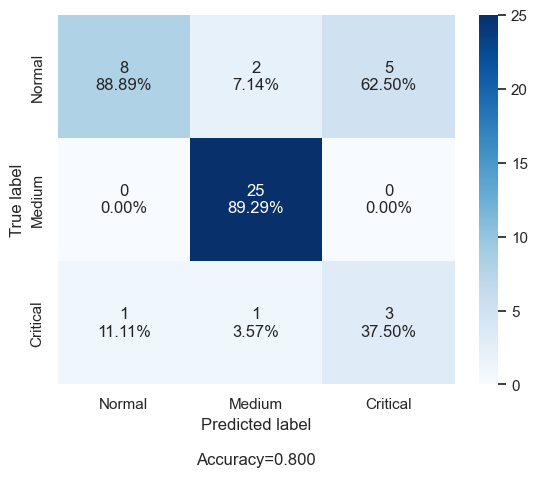

In [63]:
from sklearn.metrics import confusion_matrix
yp = grid.predict(X_test_norm)
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=labelnames)